#### Analyst: Dhruv Singh <br> Report Name: Director's Request, Part 3 <br> Report Quarter, Year: FY 2018-2020 <br> Date Updated: 08/23/2021

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

#### Subsetting 3: Area Graphs

In [3]:
df1 = df[['State Id', 'EmpName', 'JobTitle', 'ExitDate', 'Year']]

In [4]:
df1 = df1.sort_values(by=['Year', 'State Id', 'ExitDate'], ascending = (True, True, False))

In [5]:
df1 = df1.drop_duplicates(subset = ['State Id'], keep='first')

##### Area Graph 1: Total Number by Employer

In [6]:
df2 = df1[['Year', 'EmpName', 'State Id']].groupby(['Year', 'EmpName']).count()

In [7]:
df2

State Id
Year EmpName                                      
2018 0                                           1
     1st Choice Staffing Agency                  1
     ALBERTSONS COMPANIES, INC.                  1
     AMAZON.COM INC                              1
     ARAMARK                                     1
...                                            ...
2021 Dynamic Concepts Inc                        2
     Fema                                        1
     Pepco Holdings, Inc.                        5
     Utility Lines Construction Services         1
     WDC Solar                                   1

[376 rows x 1 columns]

In [8]:
df2 = df2.reset_index()
df2 = df2.rename(columns = {"State Id": "Number Employed"})

In [9]:
df2_long = df2.pivot_table(index='Year', columns='EmpName', values='Number Employed').reset_index()

In [10]:
df2_long = df2_long.fillna(0)

In [11]:
df2_long = df2_long.set_index('Year')

In [12]:
df2_long

EmpName,0,1st Choice Staffing Agency,"22nd Century Technologies, Inc.",22nd Century Technology,"ALBERTSONS COMPANIES, INC.",AMAZON.COM INC,ARAMARK,ARAMARK Food & Support Svc.,AT YOUR SERVICE DC,Access Demolition Contracting Inc.,...,Zeta Phi Beta Sorority,herwin-Williams Commercial Paint Store,istrict Dept. of Transportation (DDOT),lowe's,oasis,oasis group holdings inc,positive construction,sodexho,stohlman volkswagen subarun Tyson's corner,utiliquest
Year,,,,,,,,,,,,,,,,,,,,,
2018,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2019,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df2_long['Pepco Holdings Inc.'] = df2_long['Pepco Holdings, Inc.'] + df2_long['Pepco Holdings Inc']

In [ ]:
# df_long.to_csv('employer.csv')

In [15]:
df2_long = df2_long[['Pepco Holdings Inc.', 'Walmart', 'Blue Ocean New Energy dba New Columbia Solar', 'The Calpro Group Inc', 'WMATA', 'Dynamic Concepts Inc']]

In [16]:
df2_long

EmpName,Pepco Holdings Inc.,Walmart,Blue Ocean New Energy dba New Columbia Solar,The Calpro Group Inc,WMATA,Dynamic Concepts Inc
Year,,,,,,
2018,5.0,6.0,6.0,4.0,6.0,1.0
2019,9.0,1.0,0.0,2.0,0.0,2.0
2020,6.0,0.0,0.0,0.0,0.0,0.0
2021,5.0,0.0,0.0,0.0,0.0,2.0


In [17]:
df2_long = df2_long.rename(columns = {'Pepco Holdings Inc.': 'Pepco', 
                                      'Walmart': 'Wlmrt', 
                                      'Blue Ocean New Energy dba New Columbia Solar': 'Bl Oc.', 
                                      'The Calpro Group Inc': 'Clpro', 
                                      'WMATA': 'WMATA', 
                                      'Dynamic Concepts Inc': 'DCI'})

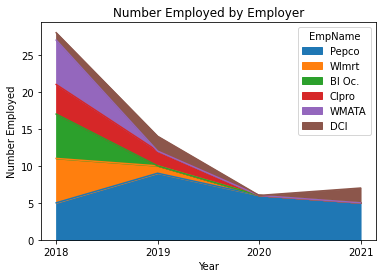

In [20]:
## comparing employers
df2_long.plot(kind='area')
plt.title('Number Employed by Employer')
plt.ylabel('Number Employed')
plt.xlabel('Year')
plt.xticks([2018, 2019, 2020, 2021])
plt.savefig('graphs/employer.png', dpi=300, bbox_inches='tight')
plt.show()

##### Area Graph 2: Total Number by Job Title

In [21]:
df3 = df1[['Year', 'JobTitle', 'State Id']].groupby(['Year', 'JobTitle']).count()

In [22]:
df3

State Id
Year JobTitle                        
2018  Street Sign Installer         2
     0                              1
     ASSOCIATE                      3
     ASSOCIATE EMPLOYEE PT          1
     Admin Asst 1                   1
...                               ...
2021 Solar Installer                1
     Substation Helper              4
     Tour Bus Driver                2
     groundsman                     1
     substation helper              1

[343 rows x 1 columns]

In [23]:
df3 = df3.reset_index()
df3 = df3.rename(columns = {"State Id": "Number Employed"})

In [24]:
df3_long = df3.pivot_table(index='Year', columns='JobTitle', values='Number Employed').reset_index()

In [25]:
df3_long = df3_long.fillna(0)

In [26]:
df3_long = df3_long.set_index('Year')

In [27]:
df3_long

JobTitle,Street Sign Installer,0,1st Level Apprentice,ASSOCIATE,ASSOCIATE EMPLOYEE PT,Admin Asst 1,Administrative,Agent,Apprentice,Apprentice 1,...,repair,sales,sales associate,seasonal helper,substation helper,substation technician,technician,unlisted,warehouse worker,workforce training supervisor
Year,,,,,,,,,,,,,,,,,,,,,
2018,2.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df3_long.to_csv('job_title.csv')

In [29]:
df3_long = df3_long[['Laborer', 'Driver', 'Associate', 'Flagger', 'Solar Installer', 'Cashier']]

In [30]:
df3_long

JobTitle,Laborer,Driver,Associate,Flagger,Solar Installer,Cashier
Year,,,,,,
2018,11.0,13.0,7.0,3.0,2.0,8.0
2019,7.0,2.0,4.0,6.0,7.0,1.0
2020,1.0,0.0,0.0,1.0,0.0,0.0
2021,6.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df3_long = df3_long.rename(columns = {'Laborer': 'Labr', 
                                      'Driver': 'Drvr', 
                                      'Associate': 'Assoc', 
                                      'Flagger': 'Flgr', 
                                      'Solar Installer': 'Slr Instlr', 
                                      'Cashier': 'Cshr'})

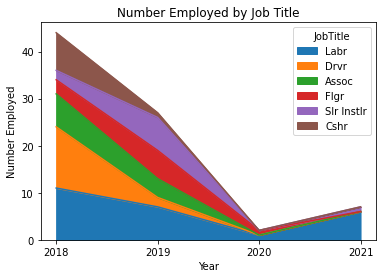

In [32]:
## comparing employers
df3_long.plot(kind='area')
plt.title('Number Employed by Job Title')
plt.ylabel('Number Employed')
plt.xlabel('Year')
plt.xticks([2018, 2019, 2020, 2021])
plt.savefig('graphs/job_title.png', dpi=300, bbox_inches='tight')
plt.show()